## Importing Data

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("2021VAERSDATA.csv", encoding = "ISO-8859-1")
data.sample(10)

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
26106   1068283  03/03/2021    MA      NaN      NaN      NaN   F      NaN   
4697     922075  01/05/2021    TX     40.0     40.0      NaN   F      NaN   
4500     921861  01/05/2021    MI     65.0     65.0      NaN   F      NaN   
22846   1049061  02/23/2021    GA     75.0     75.0      NaN   F      NaN   
19459   1031489  02/15/2021    WA     69.0      NaN      NaN   F      NaN   
23438   1049741  02/23/2021    MI     84.0     84.0      NaN   F      NaN   
343      916982  01/01/2021    WA     40.0     40.0      NaN   F      NaN   
11394    928665  01/08/2021    NH     44.0     44.0      NaN   F      NaN   
22942   1049161  02/23/2021    SC     51.0     51.0      NaN   F      NaN   
20042   1039948  02/18/2021   NaN      NaN      NaN      NaN   M      NaN   

                                            SYMPTOM_TEXT DIED  ... CUR_ILL  \
26106  Callers dr developed Diverticulitis after firs...  NaN  ...     NaN   
4697   She describes joint pain and gradual numbness ...  NaN  ...  Denies   
4500                                            T. 102.3  NaN  ...     NaN   
22846  Disorientation, temporary loss of memory, head...  NaN  ...    None   
19459  serious all-over body aches; This is a spontan...  NaN  ...     NaN   
23438                                              fever  NaN  ...      no   
343    Sore arm at the site x 3 days. that evening fa...  NaN  ...    none   
11394  nausea, lightheaded within 30 minutes no other...  NaN  ...    none   
22942  8 days later- itching at injection site, red a...  NaN  ...    none   
20042  diagnosed with cellulitis; This is a spontaneo...  NaN  ...     NaN   

                                                 HISTORY PRIOR_VAX  \
26106  Medical History/Concurrent Conditions: Diverti...       NaN   
4697                                             unknown       NaN   
4500                                                 NaN       NaN   
22846                                                NaN       NaN   
19459  Medical History/Concurrent Conditions: Fruit a...       NaN   
23438                            RA, hyperlipidemia, htn       NaN   
343                                                 none       NaN   
11394                            asthma, GERD, allergies       NaN   
22942                                               none    Tetnus   
20042                                                NaN       NaN   

                     SPLTTYPE  FORM_VERS TODAYS_DATE BIRTH_DEFECT OFC_VISIT  \
26106  USPFIZER INC2021191980          2  03/02/2021          NaN       NaN   
4697                      NaN          2  01/05/2021          NaN         Y   
4500                      NaN          2  01/05/2021          NaN       NaN   
22846                     NaN          2  02/23/2021          NaN       NaN   
19459  USPFIZER INC2021099364          2  02/14/2021          NaN       NaN   
23438                     NaN          2  02/23/2021          NaN       NaN   
343                       NaN          2  01/01/2021          NaN       NaN   
11394                     NaN          2  01/08/2021          NaN       NaN   
22942                     NaN          2  02/23/2021          NaN       NaN   
20042  USPFIZER INC2021148248          2  02/18/2021          NaN       NaN   

      ER_ED_VISIT                                          ALLERGIES  
26106         NaN                                                NaN  
4697          NaN                            no known drug allergies  
4500          NaN                                                NaN  
22846           Y                                               none  
19459         NaN                                                NaN  
23438         NaN                                               Gold  
343           NaN                                          bee venom  
11394         NaN  amoxicillin, tree nuts, molds, animals, pollen...  
22942         NaN   

In [2]:
text_df = data[['VAERS_ID','SYMPTOM_TEXT']].set_index(["VAERS_ID"])
text_df.rename(columns={'SYMPTOM_TEXT': 'text'}, inplace = True)

text_df

text
VAERS_ID                                                   
916600    Right side of epiglottis swelled up and hinder...
916601    Approximately 30 min post vaccination administ...
916602    About 15 minutes after receiving the vaccine, ...
916603    extreme fatigue, dizziness,. could not lift my...
916604    Injection site swelling, redness, warm to the ...
...                                                     ...
1092595   A high risk employee received 1st vaccine dose...
1092651                                               DEATH
1092653   Patient received the vaccine on the evening of...
1092737   Sudden death. Alone at home, found on floor 4 ...
1092883   Death. Patient lived alone, was found dead at ...

[27955 rows x 1 columns]

In [3]:
data.shape

(27955, 35)

In [4]:
data.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [5]:
text_df.isna().sum()

text    2
dtype: int64

In [6]:
text_df = text_df.dropna()
text_df.isna().sum()

text    0
dtype: int64

In [7]:
data.dtypes

VAERS_ID          int64
RECVDATE         object
STATE            object
AGE_YRS         float64
CAGE_YR         float64
CAGE_MO         float64
SEX              object
RPT_DATE         object
SYMPTOM_TEXT     object
DIED             object
DATEDIED         object
L_THREAT         object
ER_VISIT         object
HOSPITAL         object
HOSPDAYS        float64
X_STAY           object
DISABLE          object
RECOVD           object
VAX_DATE         object
ONSET_DATE       object
NUMDAYS         float64
LAB_DATA         object
V_ADMINBY        object
V_FUNDBY         object
OTHER_MEDS       object
CUR_ILL          object
HISTORY          object
PRIOR_VAX        object
SPLTTYPE         object
FORM_VERS         int64
TODAYS_DATE      object
BIRTH_DEFECT     object
OFC_VISIT        object
ER_ED_VISIT      object
ALLERGIES        object
dtype: object

In [8]:
text_df.to_csv('text_df.csv')

<h2> Data Cleaning </h2>

In [9]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\matte\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matte\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text_1(text):
    # Lowercase
    text = text.lower()
    # Remove special text in brackets ([chorus],[guitar],etc)
    text = re.sub('\[.*?\]', '', text)
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)    
    # Remove quotes
    text = re.sub('[‘’“”…]', '', text)
    # Remove new line \n 
    text = re.sub('\n', ' ', text)
    # Remove stop_word
    stop_words = stopwords.words('english')
    words = word_tokenize(text)
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [11]:
# Let's take a look at the updated text
text_clean = pd.DataFrame(text_df.text.apply(clean_text_1))

In [12]:
text_df.loc[916601]['text'][:500]

'Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow.   2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients\' SOB and anxiousness had subsided and the patient stated that they were feel "much better".'

In [13]:
text_clean.loc[916601]['text'][:500]

' approximately min post vaccination administration patient demonstrated sob anxiousness assessed time event heart sounds normal lung sounds clear vitals within normal limits patient liters nc continuous flow consecutive nebulized albuterol treatments administered approximately hours post reaction patients sob anxiousness subsided patient stated feel much better'

## Lemmatization

In [14]:
# POS tagging

from nltk import word_tokenize, pos_tag

txt = "approximately min post vaccination administration patient demonstrated sob anxiousness assessed time event heart sounds normal lung sounds clear vitals within normal limits patient liters nc continuous flow consecutive nebulized albuterol treatments administered approximately hours post reaction patients sob anxiousness subsided patient stated feel much better"
pos_tag(word_tokenize(txt))

[('approximately', 'RB'),
 ('min', 'JJ'),
 ('post', 'NN'),
 ('vaccination', 'NN'),
 ('administration', 'NN'),
 ('patient', 'NN'),
 ('demonstrated', 'VBD'),
 ('sob', 'JJ'),
 ('anxiousness', 'NN'),
 ('assessed', 'VBD'),
 ('time', 'NN'),
 ('event', 'NN'),
 ('heart', 'NN'),
 ('sounds', 'VBZ'),
 ('normal', 'JJ'),
 ('lung', 'NN'),
 ('sounds', 'NNS'),
 ('clear', 'JJ'),
 ('vitals', 'NNS'),
 ('within', 'IN'),
 ('normal', 'JJ'),
 ('limits', 'NNS'),
 ('patient', 'JJ'),
 ('liters', 'NNS'),
 ('nc', 'VBP'),
 ('continuous', 'JJ'),
 ('flow', 'JJ'),
 ('consecutive', 'JJ'),
 ('nebulized', 'VBN'),
 ('albuterol', 'NN'),
 ('treatments', 'NNS'),
 ('administered', 'VBD'),
 ('approximately', 'RB'),
 ('hours', 'NNS'),
 ('post', 'VBP'),
 ('reaction', 'NN'),
 ('patients', 'NNS'),
 ('sob', 'JJ'),
 ('anxiousness', 'RB'),
 ('subsided', 'VBD'),
 ('patient', 'NN'),
 ('stated', 'VBN'),
 ('feel', 'RB'),
 ('much', 'RB'),
 ('better', 'JJR')]

In [15]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatize_tag(text):
    lemma=[]
    for i,j in pos_tag(word_tokenize(text)) :
        p=j[0].lower()
        if p in ['j','n','v']:
            if p == 'j':
                p = 'a'
            lemma.append(wnl.lemmatize(i,p))
        else :
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)

In [16]:
text_clean.loc[916601]['text'][:500]

' approximately min post vaccination administration patient demonstrated sob anxiousness assessed time event heart sounds normal lung sounds clear vitals within normal limits patient liters nc continuous flow consecutive nebulized albuterol treatments administered approximately hours post reaction patients sob anxiousness subsided patient stated feel much better'

In [17]:
text_clean = pd.DataFrame(text_clean.text.apply(lemmatize_tag))

In [18]:
text_clean.loc[916601]['text'][:500]

'approximately min post vaccination administration patient demonstrate sob anxiousness assess time event heart sound normal lung sound clear vitals within normal limit patient liter nc continuous flow consecutive nebulized albuterol treatment administer approximately hour post reaction patient sob anxiousness subside patient state feel much good'

In [19]:
text_clean.to_csv("text_clean.csv")

## Stopwords

In [21]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
text_cv = cv.fit_transform(text_clean.text)
text_dtm = pd.DataFrame(text_cv.toarray(), columns=cv.get_feature_names())
text_dtm.index = text_clean.index
text_dtm

aa  aaa  aafib  aafter  aaox  aat  ab  aback  abate  abated  ...  \
VAERS_ID                                                               ...   
916600     0    0      0       0     0    0   0      0      0       0  ...   
916601     0    0      0       0     0    0   0      0      0       0  ...   
916602     0    0      0       0     0    0   0      0      0       0  ...   
916603     0    0      0       0     0    0   0      0      0       0  ...   
916604     0    0      0       0     0    0   0      0      0       0  ...   
...       ..  ...    ...     ...   ...  ...  ..    ...    ...     ...  ...   
1092595    0    0      0       0     0    0   0      0      0       0  ...   
1092651    0    0      0       0     0    0   0      0      0       0  ...   
1092653    0    0      0       0     0    0   0      0      0       0  ...   
1092737    0    0      0       0     0    0   0      0      0       0  ...   
1092883    0    0      0       0     0    0   0      0      0       0  ...   

          zyrtecd  zyrtecsymptoms  zyrtek  zyrtex  zytec  zyterecd  zytiga  \
VAERS_ID                                                                     
916600          0               0       0       0      0         0       0   
916601          0               0       0       0      0         0       0   
916602          0               0       0       0      0         0       0   
916603          0               0       0       0      0         0       0   
916604          0               0       0       0      0         0       0   
...           ...             ...     ...     ...    ...       ...     ...   
1092595         0               0       0       0      0         0       0   
1092651         0               0       0       0      0         0       0   
1092653         0               0       0       0      0         0       0   
1092737         0               0       0       0      0         0       0   
1092883         0               0       0       0      0         0       0   

          zyxal  zzzquil  ño  
VAERS_ID                      
916600        0        0   0  
916601        0        0   0  
916602        0        0   0  
916603        0        0   0  
916604        0        0   0  
...         ...      ...  ..  
1092595       0        0   0  
1092651       0        0   0  
1092653       0        0   0  
1092737       0        0   0  
1092883       0        0   0  

[27953 rows x 22710 columns]

In [22]:
text_dtm['pain'].value_counts()

0     22279
1      3034
2      1209
3       536
4       326
5       174
6       121
7        79
8        49
9        27
10       27
12       23
11       17
14       15
15       10
13        8
19        5
16        4
21        2
18        2
17        1
41        1
27        1
25        1
22        1
20        1
Name: pain, dtype: int64

In [23]:
text_data=text_dtm.transpose()
text_data.columns

Int64Index([ 916600,  916601,  916602,  916603,  916604,  916606,  916607,
             916608,  916609,  916610,
            ...
            1092168, 1092214, 1092477, 1092483, 1092485, 1092595, 1092651,
            1092653, 1092737, 1092883],
           dtype='int64', name='VAERS_ID', length=27953)

In [24]:
# Find the top 30 words 

text_data=text_dtm.transpose()

top_dict = {}
for c in text_data.columns:
    top = text_data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{916600: [('benadryl', 1),
  ('epiglottis', 1),
  ('swell', 1),
  ('tylenol', 1),
  ('right', 1),
  ('picture', 1),
  ('swallowing', 1),
  ('hinder', 1),
  ('figured', 0),
  ('fifth', 0),
  ('fiftycent', 0),
  ('fight', 0),
  ('fighter', 0),
  ('fighting', 0),
  ('figure', 0),
  ('ño', 0),
  ('figuring', 0),
  ('file', 0),
  ('filgrastim', 0),
  ('filing', 0),
  ('filler', 0),
  ('filling', 0),
  ('film', 0),
  ('filmcoated', 0),
  ('fin', 0),
  ('fiever', 0),
  ('fierce', 0),
  ('fiery', 0),
  ('fiercely', 0),
  ('fibrillation', 0)],
 916601: [('patient', 4),
  ('sob', 2),
  ('normal', 2),
  ('anxiousness', 2),
  ('post', 2),
  ('approximately', 2),
  ('sound', 2),
  ('reaction', 1),
  ('subside', 1),
  ('albuterol', 1),
  ('demonstrate', 1),
  ('clear', 1),
  ('vitals', 1),
  ('hour', 1),
  ('consecutive', 1),
  ('assess', 1),
  ('flow', 1),
  ('limit', 1),
  ('good', 1),
  ('liter', 1),
  ('nc', 1),
  ('treatment', 1),
  ('nebulized', 1),
  ('state', 1),
  ('lung', 1),
  ('event', 1

In [25]:
# Print the top 30 words said by each Report ID
for VAERS_ID, top_words in top_dict.items():
    print(VAERS_ID)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

916600
benadryl, epiglottis, swell, tylenol, right, picture, swallowing, hinder, figured, fifth, fiftycent, fight, fighter, fighting, figure, ño, figuring, file, filgrastim, filing, filler, filling, film, filmcoated, fin, fiever, fierce, fiery, fiercely, fibrillation
---
916601
patient, sob, normal, anxiousness, post, approximately, sound, reaction, subside, albuterol, demonstrate, clear, vitals, hour, consecutive, assess, flow, limit, good, liter, nc, treatment, nebulized, state, lung, event, time, feel, administration, heart
---
916602
patient, benadryl, complain, receive, ems, minute, service, arm, mg, able, chest, tablet, left, difficulty, walk, change, er, tightness, facility, advised, swallow, check, hurting, vision, observe, vaccine, em, finished, fighting, fiery
---
916603
arm, left, extreme, fatigue, dizziness, lift, hour, filgrastim, fight, fighter, fighting, figure, figured, figuring, file, ño, filing, filler, fifth, filling, film, filmcoated, fin, final, finalize, fiftycent

---
917764
headache, fever, fatigue, shiver, tightness, chest, filgrastim, fight, fighter, fighting, figure, figured, figuring, file, filing, fifth, filler, filling, film, filmcoated, fin, final, finalize, finally, fiftycent, ño, fiever, fibromyalgia, fibrillationflutter, fibrillationheart
---
917765
cellulite, vaccination, daily, excessive, day, redness, mild, begin, swell, present, area, headache, feel, itch, appear, file, fighting, figured, fighter, figuring, figure, filing, filgrastim, fiftycent, filler, filling, film, filmcoated, fin, fight
---
917767
mild, vertigo, light, minute, vaccinehad, wake, minuteslightheadedness, morning, night, sleep, true, minutesnext, reclinervomited, minutesthat, positionalever, return, continue, feel, tachycardia, head, nausea, headednesshave, start, figure, fiever, fifth, fight, fighting, fighter, fiftycent
---
917768
night, fever, vaccine, hour, develop, separate, order, bowel, episode, urgent, study, covid, drench, swab, stool, pain, bright, time,

919221
arm, headache, temp, pain, work, sx, tylenol, pm, injection, bad, fine, fatigue, mild, really, thermometer, tympanic, feel, day, start, leave, read, left, completely, sharp, subside, couch, return, chill, stayed, tired
---
919222
antihistamine, treatment, rash, leg, macolopapular, figured, fiery, fiever, fifth, fiftycent, fight, fighter, fighting, figure, ño, figuring, fiercely, filgrastim, filing, filler, filling, film, filmcoated, fin, file, fierce, finalize, fibrinogin, fibrilation, fibrillation
---
919223
leave, pain, movement, tenderness, restrict, swell, thumb, hand, joint, fighting, fiever, fifth, fiftycent, fight, fighter, figured, figure, fiercely, figuring, file, filgrastim, filing, filler, filling, film, filmcoated, fiery, field, fierce, final
---
919225
redness, vaccination, site, week, warm, itch, begin, mild, inj, filling, fifth, fiftycent, fight, fighter, fighting, figure, final, film, figuring, file, filgrastim, fiever, filing, filler, fin, filmcoated, figured, f

---
920559
fatigue, fever, vaccine, low, day, hour, ache, grade, later, develop, body, filler, fighter, fighting, finalize, figure, figured, figuring, final, filling, fin, filmcoated, file, filgrastim, fight, filing, film, ño, fiever, fiftycent
---
920561
headache, day, start, throat, severe, muscle, sore, mild, ache, ño, fiftycent, fight, fighter, fighting, figure, figured, file, figuring, filgrastim, filing, filler, filling, film, filmcoated, fin, fifth, fiery, fiever, fibroid, fibrillationaflib
---
920562
administer, covid, day, person, moderna, episodes, hyperglycemia, later, couple, vaccine, fiftycent, fight, fighter, fighting, figure, figuring, figured, fiever, file, filgrastim, filing, filler, filling, film, filmcoated, fin, fifth, ño, fiery, fiercely
---
920563
pain, pm, symptom, temperature, away, felt, day, experienced, ache, immunization, bed, moderate, joint, tired, woke, body, fever, start, like, arm, file, figuring, figured, fin, filgrastim, filmcoated, fighting, filing, 

---
922155
bp, palpitation, initial, benadryl, neck, pulse, lightheadedness, fine, intermittently, mg, vaccine, ivp, rash, respiration, receive, note, chest, feel, nausea, right, filgrastim, fighting, film, fiftycent, fight, fighter, figured, figure, figuring, filling
---
922156
staff, steady, sat, scratchy, pressure, sensation, swallow, remain, minute, additional, flushed, blood, elevate, healthcare, benadryl, described, fibroid, figuring, fighter, fighting, figure, figured, fibrillationstarted, fibrillationheart, file, fiftycent, filgrastim, fibrillationflutter, fibrillationaflib, filing
---
922157
day, dt, unable, headache, pain, moderna, arm, effect, soreness, use, adverse, injection, liftingpushingpulling, increase, include, receive, fibroid, figure, fibrillationsudden, figured, fibrillationstarted, figuring, file, filgrastim, filing, filler, fibrillationheart, filling, film, fibrillationflutter
---
922158
chest, benadryl, minute, throat, improve, discomfort, clinic, mg, felt, sym

923713
servere, like, diarrhea, ache, headedness, light, muscle, sore, dizziness, fever, flu, throat, vomit, fiftycent, fifth, fiever, fight, fighter, file, fighting, figure, figured, figuring, fiercely, filgrastim, filing, filler, filling, fiery, fidget
---
923714
patient, arm, vitamin, ball, itchy, vaccine, red, receive, swell, site, injection, golf, size, vaccination, report, week, prior, event, dose, acid, include, assess, store, know, penicillin, acetylsalicylic, request, information, test, pharmacy
---
923715
fatigue, nausea, site, ache, chillsshivering, injection, tenderness, extreme, body, pain, filmcoated, figuring, fight, fighter, fighting, figure, final, figured, file, film, filgrastim, filing, fiftycent, filler, fin, filling, ño, fiery, fifth, fiever
---
923716
feel, crummy, arm, like, sore, little, vaccine, patient, soreness, swollen, good, include, report, xinafoate, medication, really, know, single, asthma, feeling, day, salmeterol, nurse, puff, unknown, advair, program,

924993
day, lasting, acetaminophen, sorenesspain, hot, flash, headache, prn, fatigue, arm, profusely, sweat, min, injection, fir, figuring, fifth, fiftycent, fight, fighter, fighting, figure, figured, file, fiery, filgrastim, filing, filler, filling, film
---
924994
swell, redness, rash, site, injection, ño, figure, fiercely, fiery, fiever, fifth, fiftycent, fight, fighter, fighting, figuring, figured, file, filgrastim, filing, filler, filling, film, filmcoated, fierce, fidget, field, fibrin, fibo, fibrilation
---
924995
hand, right, numb, fall, multiple, certain, time, sensation, sleep, wrist, tingly, asleep, area, dayfairly, fifth, figuring, file, filing, figured, filler, filgrastim, figure, filling, film, fighting, fighter, fight, filmcoated, fiftycent, ño
---
924996
blood, ha, pressure, fatigue, high, nausea, ño, filing, fighting, figure, figured, figuring, file, filgrastim, film, filler, filling, fight, filmcoated, fin, final, finalize, finally, fighter, fiftycent, financial, fift

receive, start, hive, ache, upper, abdomen, symptom, hour, vaccine, develop, continue, chest, dizziness, body, filmcoated, fight, fighter, fighting, figure, fin, film, filgrastim, figured, filling, figuring, filler, filing, file, fiftycent, fierce
---
926534
test, covid, work, negative, imodium, day, diarrhea, hour, away, fighting, fifth, fiftycent, fight, fighter, figure, fiery, figured, figuring, file, filgrastim, filing, filler, filling, film, filmcoated, fiever, ño, fiercely, fibro, fibrillation
---
926535
headache, chill, muscle, nausea, ear, throat, pain, sore, ache, body, diarrhea, fever, file, fifth, fiftycent, fight, fighter, fighting, figure, figured, figuring, filgrastim, fiery, filing, filler, filling, film, firmly, filmcoated, fin
---
926536
work, day, center, injection, today, medical, number, advise, encounter, morning, floor, person, left, thought, job, moderna, decide, hotline, return, look, tuesday, returned, body, swollen, place, dose, medicine, immediately, lump, ar

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




like, rash, pimple, leg, broke, itch, arm, ño, filgrastim, fight, fighter, fighting, figure, figured, figuring, file, filler, filing, fifth, filling, film, filmcoated, fin, final, finalize, fiftycent, fiery, fiever, fibromyalgia, fibrillationflutter
---
1049737
swell, problem, swallow, firmly, figured, fiery, fiever, fifth, fiftycent, fight, fighter, fighting, figure, figuring, fierce, file, filgrastim, filing, filler, filling, film, filmcoated, fin, fiercely, field, firmdense, fibrin, fibo, fibrilation, fibrillation
---
1049738
fatique, headache, fever, approx, day, nausea, ño, file, fight, fighter, fighting, figure, figured, figuring, filing, filgrastim, fifth, filler, filling, film, filmcoated, fin, final, fiftycent, fiery, fiever, finally, fibrillationaflib, fibrillationflutter, fibrillationheart
---
1049739
pan, muscle, chest, ño, file, fiftycent, fight, fighter, fighting, figure, figured, figuring, filing, filgrastim, fiever, filler, filling, film, filmcoated, fin, final, finali

die, night, administration, sleep, patient, figured, fiever, fifth, fiftycent, fight, fighter, fighting, figure, figuring, fiercely, file, filgrastim, filing, filler, filling, film, filmcoated, fin, fiery, ño, fierce, finalize, fibrilation, fibrillation, fibrillationaflib
---
1058579
symptom, pt, receive, positive, covid, hospital, np, fatigue, temp, pcr, dose, test, present, generalize, supplemental, confusion, max, develop, need, hallucination, pfizer, admit, malaise, vaccine, fingerthumb, fighting, fiever, firelight, fifth, fiftycent
---
1058590
syncopal, episode, jan, day, feb, arm, vaccine, patient, fatigue, weakness, covid, legs, numbness, tingle, fighting, fighter, fight, figure, ño, figured, figuring, file, filgrastim, filing, filler, filling, film, filmcoated, fiftycent, fiercely
---
1058594
kidney, sepsis, total, failure, filgrastim, fiftycent, fight, fighter, fighting, figure, figured, figuring, file, filler, filing, fiever, filling, film, filmcoated, fin, final, finalize, f

---
1068210
pain, patient, report, leg, vaccine, walk, hardly, include, terrible, number, dose, neuropathy, receive, event, immunisation, nerve, arm, lot, history, day, previously, intramuscular, require, outcome, bad, medication, date, pregabalin, right, single
---
1068212
report, low, unspecified, temperature, chill, symptom, positive, grade, date, dose, event, work, outcome, breath, shortness, patient, number, lot, request, test, nurse, lotbatch, expiration, history, like, immunization, experience, subside, unknown, information
---
1068214
vaccine, patient, say, blood, history, report, arm, work, thinner, include, insulin, receive, legs, sore, bathroom, high, pfizer, event, ongoing, diabetes, immunization, night, administer, stent, dizziness, dizzy, suspect, worsened, medical, sugar
---
1068218
patient, report, date, foot, unspecified, little, hive, kind, ankle, terrible, itch, dose, uncomfortable, rash, time, unknown, bit, skin, ablation, single, pfizerbiontech, medication, male, l

---
1078654
pt, consciousness, bp, unresponsive, vaccine, regain, pm, slowly, approximately, unconscious, hypotensive, systolic, hour, lose, minute, em, receive, spontaneously, normal, return, fighting, file, figuring, fierce, fiercely, fiery, fighter, fiever, fifth, figured
---
1078664
body, chill, fatigue, ache, headache, fever, film, figure, figured, figuring, file, filgrastim, filing, filler, filling, fibrillationsudden, fighter, filmcoated, fin, fibrillationheart, final, finalize, finally, finallyby, financial, fighting, fight, fibrin, fiftycent, fibrinogin
---
1078680
min, pt, blood, elevate, persist, later, pressure, repeat, bp, filmcoated, fight, finally, fighter, finalize, fighting, figure, figured, figuring, file, filgrastim, filing, final, fin, filling, film, filler, fiftycent, financial, fibromyalgianever, fibrillationflutter
---
1078688
redness, itchiness, face, chest, neck, ño, filgrastim, fighter, fighting, figure, figured, figuring, file, filling, filing, filler, finall

In [26]:
# Look at the most common top words 
from collections import Counter

# Let's first pull out the top 30 words for each Report ID
words = []
for VAERS_ID in text_data.columns:
    top = [word for (word, count) in top_dict[VAERS_ID]]
    for t in top:
        words.append(t)

In [27]:
Counter(words).most_common()

[('figured', 14627),
 ('figure', 14613),
 ('figuring', 14556),
 ('fighting', 14411),
 ('file', 14403),
 ('filgrastim', 14136),
 ('fighter', 14117),
 ('filing', 13754),
 ('fight', 13681),
 ('filler', 13218),
 ('fiftycent', 13043),
 ('filling', 12421),
 ('fifth', 11923),
 ('film', 11414),
 ('patient', 10761),
 ('vaccine', 10474),
 ('fiever', 10448),
 ('filmcoated', 10030),
 ('fiery', 8941),
 ('ño', 8609),
 ('fin', 8431),
 ('report', 8118),
 ('receive', 7538),
 ('day', 7231),
 ('dose', 7097),
 ('final', 6508),
 ('fiercely', 6479),
 ('arm', 6356),
 ('event', 5853),
 ('pain', 5318),
 ('headache', 5191),
 ('injection', 5122),
 ('fibrillationflutter', 4697),
 ('finalize', 4641),
 ('fibrillationaflib', 4637),
 ('site', 4170),
 ('fever', 4099),
 ('fibrillationheart', 3951),
 ('hour', 3909),
 ('medication', 3786),
 ('fierce', 3768),
 ('leave', 3660),
 ('history', 3648),
 ('fibrillation', 3613),
 ('number', 3577),
 ('chill', 3531),
 ('vaccination', 3484),
 ('unknown', 3435),
 ('start', 3378),
 ('

In [28]:
#Excluding the most common words which do not convey additional information like 'pain'
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6479]
add_stop_words

['figured',
 'figure',
 'figuring',
 'fighting',
 'file',
 'filgrastim',
 'fighter',
 'filing',
 'fight',
 'filler',
 'fiftycent',
 'filling',
 'fifth',
 'film',
 'patient',
 'vaccine',
 'fiever',
 'filmcoated',
 'fiery',
 'ño',
 'fin',
 'report',
 'receive',
 'day',
 'dose',
 'final']

In [29]:
kept_words = ['filgrastim','fiftycent','filmcoated','pain','fiever']

for word in kept_words:
    if word in add_stop_words:
        add_stop_words.remove(word)
        
add_stop_words

['figured',
 'figure',
 'figuring',
 'fighting',
 'file',
 'fighter',
 'filing',
 'fight',
 'filler',
 'filling',
 'fifth',
 'film',
 'patient',
 'vaccine',
 'fiery',
 'ño',
 'fin',
 'report',
 'receive',
 'day',
 'dose',
 'final']

In [36]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [45]:
stop_words2=[]
for w in stop_words:
    stop_words2.append(w)

stop_words2.extend(["unknown","vaccination","event","number","lot","medical","administration","information",'know','well','also','dont','one','would','could','many','may','think','please','thanks','anyone','someone','think','im','get','people','like','time','good'])

## Nouns and Adjectives

In [32]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [33]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(text_clean.text.apply(nouns_adj))
data_nouns_adj

text
VAERS_ID                                                   
916600    right side epiglottis swell hinder picture ben...
916601    min post vaccination administration patient de...
916602    minute receive vaccine patient complain arm hu...
916603              extreme fatigue dizziness left arm hour
916604        injection site swell redness warm touch itchy
...                                                     ...
1092595   high risk employee vaccine dose health center ...
1092651                                               death
1092653   patient vaccine state fine bed check patient s...
1092737     sudden death home floor hour last phone contact
1092883   death patient dead morning follow second dose ...

[27953 rows x 1 columns]

In [34]:
final_text = data_nouns_adj.to_json()
final_text[:500]

'{"text":{"916600":"right side epiglottis swell hinder picture benadryl tylenol","916601":"min post vaccination administration patient demonstrate sob assess time event heart sound normal lung clear vitals normal limit patient liter continuous flow consecutive albuterol treatment administer hour post reaction patient sob anxiousness subside patient state good","916602":"minute receive vaccine patient complain arm hurting chest tightness difficulty swallow patient vision change patient tablet bena'

## Wordcloud

In [46]:
from wordcloud import WordCloud

wc = WordCloud(width=1920, height=1080, collocations=False,stopwords=stop_words2, background_color="white", colormap="Dark2",
               max_font_size=300, random_state=42)

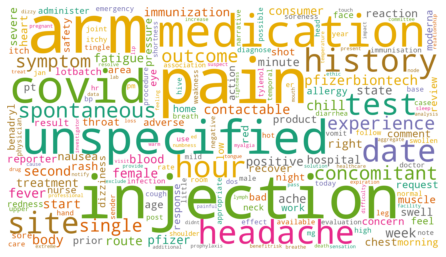

In [47]:
wordcloud = wc.generate(final_text)
import matplotlib.pyplot as plt

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [48]:
wordcloud.to_file('wordcloud.png')